In [1]:
# !pip3 install scikit-learn
# !pip3 install seaborn
# !pip3 install statsmodels --upgrade

In [2]:
# !pip3 lists

In [17]:
!conda install sklearn
!conda install git+https://github.com/statsmodels/statsmodels
!conda install statsmodels --upgrade

Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - sklearn

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - //github.com/statsmodels/statsmodels

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


usage: conda-script.py [-h] [--no-plugins] [-V] COMMAND ...
conda-script.py: error: unrecognized arguments: --upgrade


In [18]:
!conda list

# packages in environment at C:\Users\student\anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2023.09             py311_mkl_1  
_py-xgboost-mutex         2.0                       cpu_0    anaconda
abseil-cpp                20211102.0           hd77b12b_0  
aiobotocore               2.5.0           py311haa95532_0  
aiofiles                  22.1.0          py311haa95532_0  
aiohttp                   3.8.5           py311h2bbff1b_0  
aioitertools              0.7.1              pyhd3eb1b0_0  
aiosignal                 1.2.0              pyhd3eb1b0_0  
aiosqlite                 0.18.0          py311haa95532_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda-anon-usage       0.4.2           py311hfc23b7f_0  
anaconda-catalogs         0.2.0           py311haa95532_0  
anaconda-client           1.12.1          py311haa95532_0  
anaconda-cloud-auth       0.1.3           py311haa95532_0  
anaconda-navigator      

In [19]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [20]:
import numpy as np
#numpy（數值計算套件）：提供多維數組（numpy陣列）的支持，包含數學函數，用於處理數字數據。
import pandas as pd
#pandas（數據處理和分析套件）：提供DataFrame數據結構，用於結構化數據的載入和處理，支持數據索引、選擇、過濾和聚合。
import matplotlib.pyplot as plt
#matplotlib（數據可視化套件）：提供繪圖函數，用於創建各種數據可視化圖形，例如折線圖、散點圖、直方圖等。
import seaborn as sns
#seaborn（高級數據可視化套件）：建立在matplotlib之上，提供更簡單的數據可視化接口，包含各種統計圖表。
from sklearn.metrics import mean_squared_error
#mean_squared_error（均方誤差）：從sklearn套件中引入，用於計算機器學習模型的均方誤差指標。
from sklearn.model_selection import cross_val_score
#cross_val_score（交叉驗證得分）：從sklearn套件中引入，用於進行模型選擇和評估，通常用於機器學習模型的交叉驗證。
from collections import Counter
#Counter：Python的內置套件，用於計數元素的出現次數，通常用於數據統計和分析。

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

## Purpose
(1) 請問每個地區預測房價是多少?
(2) 什麼因素會影響房價

# 1. import data

### <span style="color:#3498DB">Point: 了解資料形式</span>

該數據收集於1978年，506個樣本代表波士頓各個郊區房屋，14個特徵的信息。

In [31]:
dataset = pd.read_csv('BostonHousing.csv', sep=',', encoding='UTF-8')
dataset.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [22]:
# boston_dataset = load_boston()
# dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
# dataset.info()

In [32]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### <span style="color:#3498DB">Point: 請了解變數定義</span>

### <span style="color:#3498DB">Point: 確認預測目標Y </span>

In [24]:
# dataset['MEDV'] = boston_dataset.target

# 2. Data preprocessing

In [29]:
dataset.head()
#就是看前幾筆，可以不用 因為我上面已經有了

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
dataset.columns
#獲取抬頭標籤

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## 標準化

* 當數據集中的不同特徵之間的尺度差異很大時，擬合的線性迴歸模型可能會受到影響，因為較大的特徵尺度可能會支配著較小的特徵尺度。
* 在這種情況下，標準化可以幫助線性迴歸模型更好地捕捉特徵之間的關係，提高模型的準確性和穩定性。
* 如果特徵之間的尺度差異較小，則標準化可能不是必要的。在這種情況下，可以直接使用原始數據進行線性迴歸建模。
* 在某些情況下，標準化可能會導致特徵之間的相關性變弱，因此需要根據具體的數據集和問題來決定是否需要進行標準化。

In [43]:
from sklearn import preprocessing
#建立MinMaxScaler物件
minmax = preprocessing.MinMaxScaler()
# minmax資料標準化　把 dataset.head() 的內容的數值全部都變成　０～１　之間
x_minmax = minmax.fit_transform(dataset[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']])
'''
這完成標準化
'''
# 將數據轉換為Pandas DataFrame，同時指定列名
x_minmax_df = pd.DataFrame(x_minmax, columns=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'])

# 顯示經過標準化處理的前五行數據，包含列名
print(x_minmax_df.head())

       CRIM    ZN     INDUS       NOX        RM       AGE       DIS       RAD  \
0  0.000000  0.18  0.067815  0.314815  0.577505  0.641607  0.269203  0.000000   
1  0.000236  0.00  0.242302  0.172840  0.547998  0.782698  0.348962  0.043478   
2  0.000236  0.00  0.242302  0.172840  0.694386  0.599382  0.348962  0.043478   
3  0.000293  0.00  0.063050  0.150206  0.658555  0.441813  0.448545  0.086957   
4  0.000705  0.00  0.063050  0.150206  0.687105  0.528321  0.448545  0.086957   

        TAX   PTRATIO         B     LSTAT  
0  0.208015  0.287234  1.000000  0.089680  
1  0.104962  0.553191  1.000000  0.204470  
2  0.104962  0.553191  0.989737  0.063466  
3  0.066794  0.648936  0.994276  0.033389  
4  0.066794  0.648936  1.000000  0.099338  


In [45]:
x_minmax= pd.DataFrame(x_minmax, columns=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 
                                          'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'])
# 建一個新的DataFrame，名為 x_minmax，並且指定了新的列名（列標籤）。
# 具體來說，它將名為 x_minmax 的數據集
# （假設這是經過某種數據預處理的數據）的列名重新命名

In [46]:
res_minmax = pd.concat([x_minmax.reset_index(drop=True), dataset['CHAS']], axis=1)
'''
目的：原本是沒有 CHAS 後面再加上來

x_minmax.reset_index(drop=True)：首先，x_minmax 是經過最小-最大標準化處理的特徵數據，
這行程式碼使用 reset_index(drop=True) 來重新設置 x_minmax DataFrame 的索引，同時丟棄現有的索引，以確保索引從零開始。

dataset['CHAS']：接下來，它從原始數據集 dataset 中選擇 'CHAS' 列，這是一個二元特徵列，
其中每個值表示是否靠近Charles River(指查爾斯河)（通常是0或1）。

pd.concat([x_minmax.reset_index(drop=True), dataset['CHAS']], axis=1)：
最後，它使用 pd.concat 函數，將經過最小-最大標準化處理的 x_minmax DataFrame 和 'CHAS' 列水平合併，
axis=1 表示水平合併。這樣，res_minmax DataFrame 中將包含 x_minmax 中的標準化數據和 'CHAS' 列的二元特徵值。
'''
res_minmax

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0
502,0.000438,0.00,0.420455,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0
503,0.000612,0.00,0.420455,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0
504,0.001161,0.00,0.420455,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0


## 設定特徵和標籤

In [53]:
dataset.iloc[:, 0:13]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [57]:
#dataset.iloc[:, 0:13].values
print(type(X))

<class 'numpy.ndarray'>


In [63]:
# X = res_minmax.iloc[:, 0:13].values
X = dataset.iloc[:, 0:13].values
'''
目的：整理準備餵給模型的資料

dataset.iloc[:, 0:13]：這一部分使用 Pandas 的 .iloc 方法從 dataset 中選擇所有的行
（表示總體數據集中的所有樣本）和列索引 0 到 12（表示前 13 列特徵）。這樣就選擇了數據集中的所有特徵列。

.values：這一部分將選取的 DataFrame 轉換為 NumPy 陣列，以便後續機器學習模型的訓練和使用。
X 變數將包含數據集中的特徵數據，每一行是一個樣本，每一列是一個特徵。
'''

y = dataset.iloc[:, 13].values.reshape(-1,1) # 轉換成1個column。從橫的轉乘直的
'''
.reshape(-1, 1)：這一部分將目標變數 y 的形狀從原來的一維陣列調整為二維陣列，
其中每一行代表一個樣本的目標值。這樣的形狀調整是為了確保 y 的維度符合機器學習模型的要求，
通常模型期望目標變數是一個二維陣列。
'''
print('-')

-


In [71]:
# 分割訓練和測試
from sklearn.model_selection import train_test_split
#test_size 切的尺寸 30% random_state讓抽取可以是穩定的結果(第一次抽根第十次抽是一樣的)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
'''
random_state：這是一個隨機種子（seed），它確保每次運行程式時都得到相同的隨機切分。
不同的種子會產生不同的隨機切分，但相同的種子會產生相同的切分。
'''
print('-')

-


In [73]:
print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test{y_test.shape}")

Shape of X_train:(354, 13)
Shape of X_test:(152, 13)
Shape of y_train:(354, 1)
Shape of y_test(152, 1)


# 3. Descriptive statistics

### <span style="color:#3498DB">Point: 請確認是否有NA</span>

In [74]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### <span style="color:#3498DB">Point: 請確認各變數的基礎統計量</span>

In [76]:
'''
dataset.describe() 
生成包含各種統計信息的摘要統計報告，通常包括以下信息：

計數（count）：每個特徵的非缺失值的數量。
平均值（mean）：每個特徵的平均值。
標準差（std）：每個特徵的標準差，表示數據的分散程度。
最小值（min）：每個特徵的最小值。
25th 百分位數（25%）：每個特徵的第一四分位數。
中位數（50%）：每個特徵的中位數，即第二四分位數。
75th 百分位數（75%）：每個特徵的第三四分位數。
最大值（max）：每個特徵的最大值。
'''
dataset.describe() 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
dataset.sort_values(by=['CRIM'], ascending=False)
#排序看 看犯罪率之類的 主要是看看極大、極小值

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
405,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49,32.7
285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2


### <span style="color:#3498DB">Point: 請觀察各X與Y的關係</span>

In [77]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

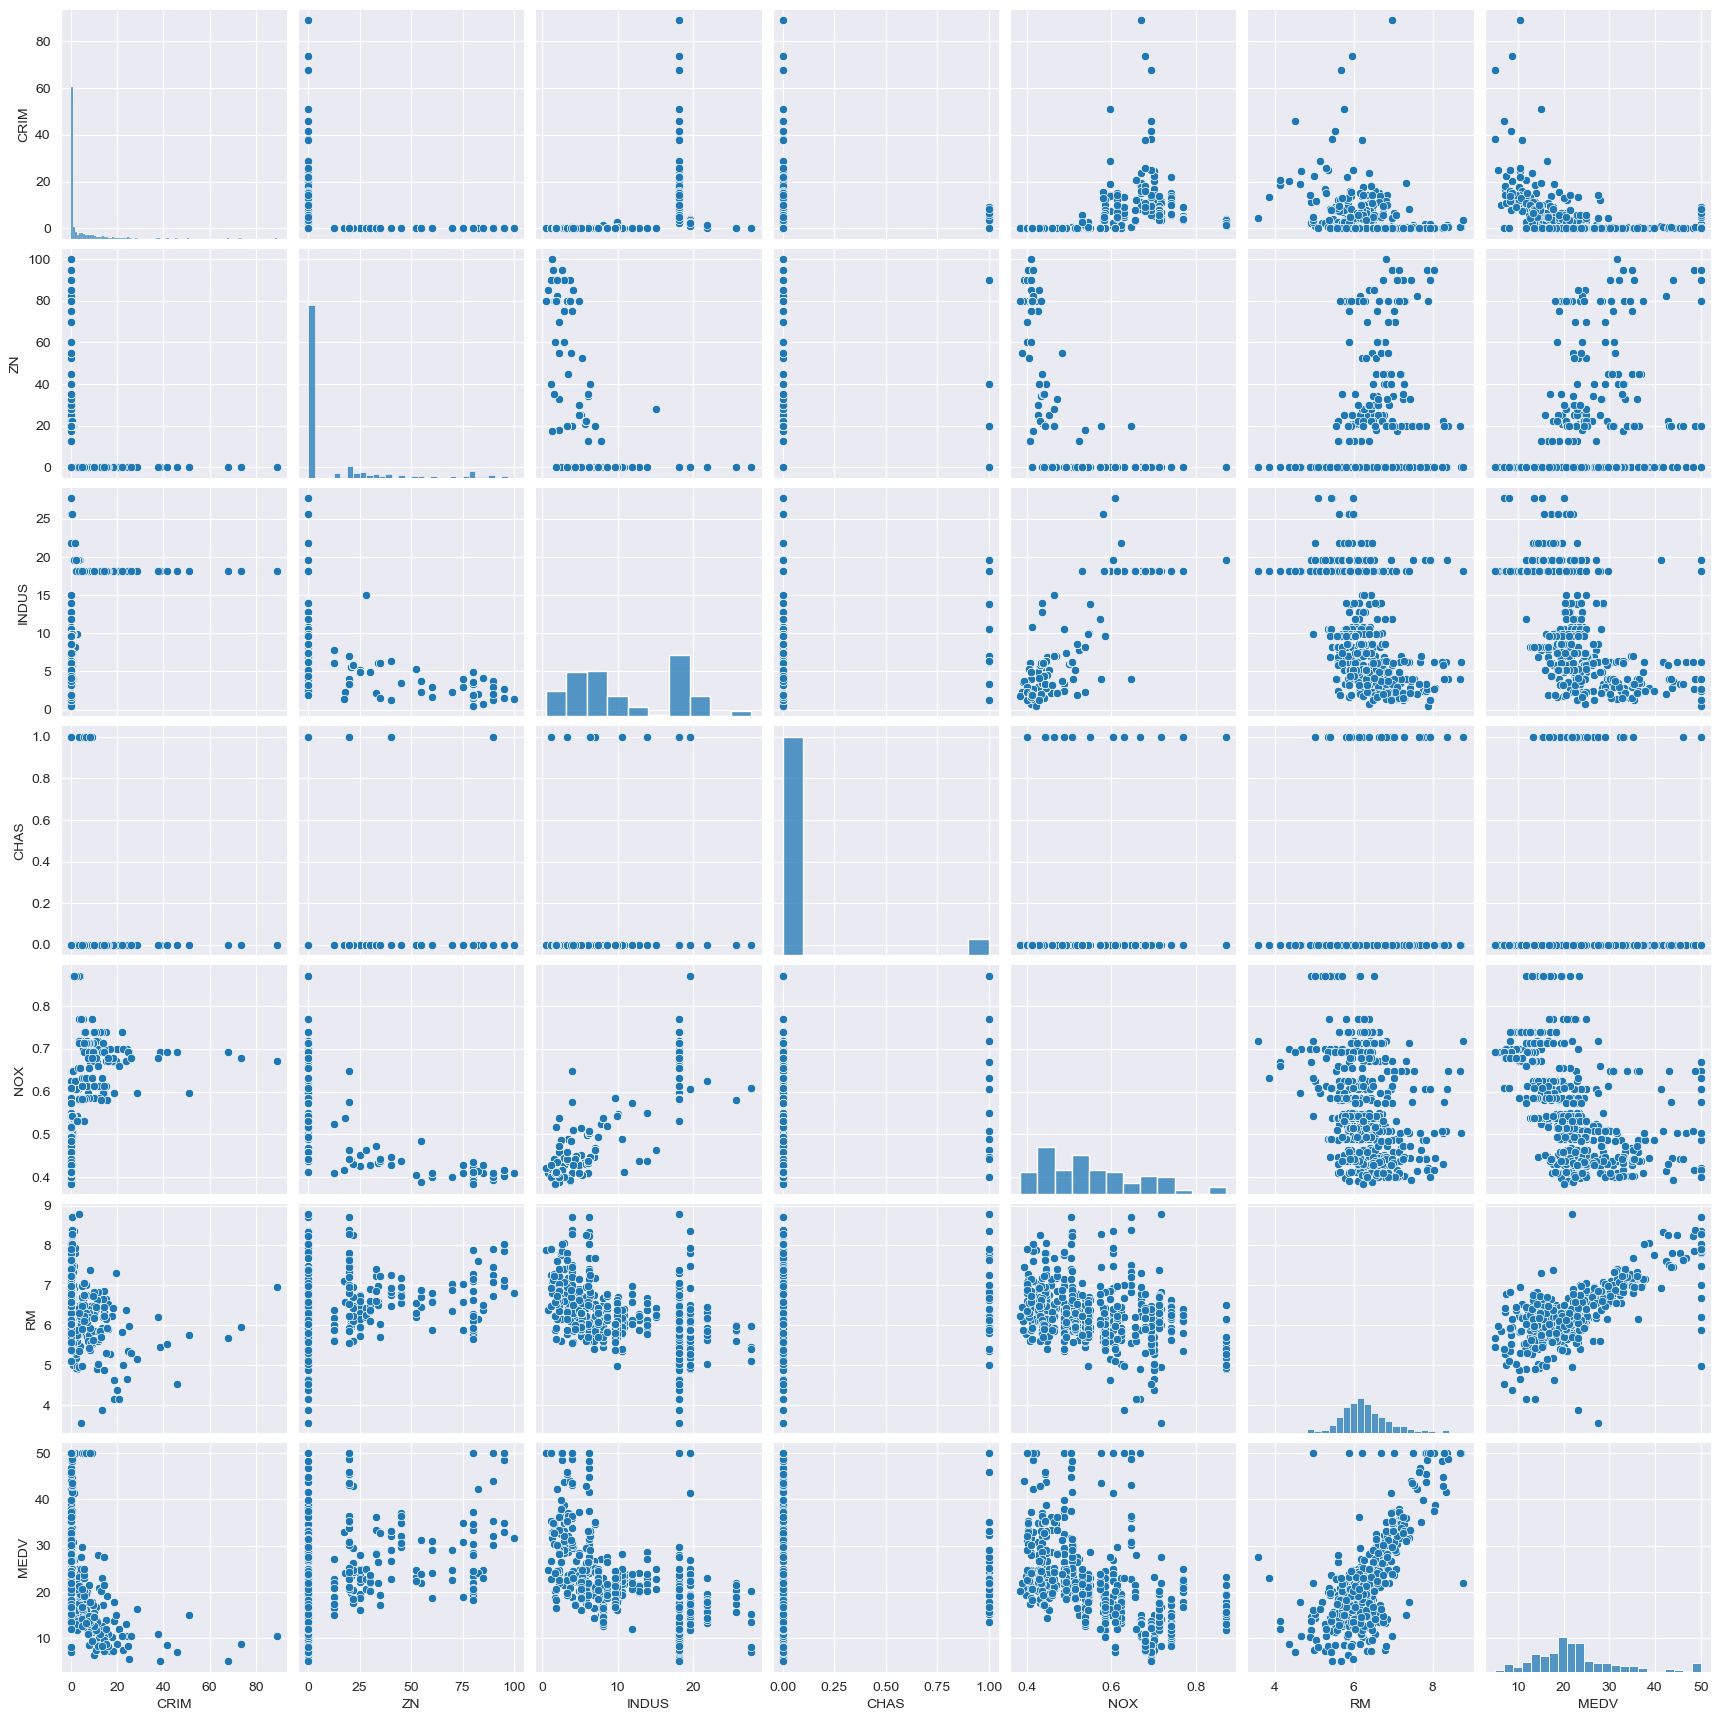

In [35]:
'''
sns.pairplot：這是 Seaborn 库中的一個函數，用於創建散點圖矩陣。
它接受一個DataFrame作為輸入，並在一個矩陣中顯示不同特徵之間的散點圖。
'''
sns.pairplot(dataset[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'MEDV']])

# CRIM：城鎮的人均犯罪率
# ZN：大於25,000平方英尺的地塊的住宅用地比例。
# INDUS：每個鎮的非零售業務英畝的比例。
# CHAS：查爾斯河虛擬變量（如果環河，則等於1；否則等於0）
# NOX：一氧化氮的濃度（百萬分之幾）
# RM：每個住宅的平均房間數
# MEDV：自有住房的中位數價值(單位：1000美元)

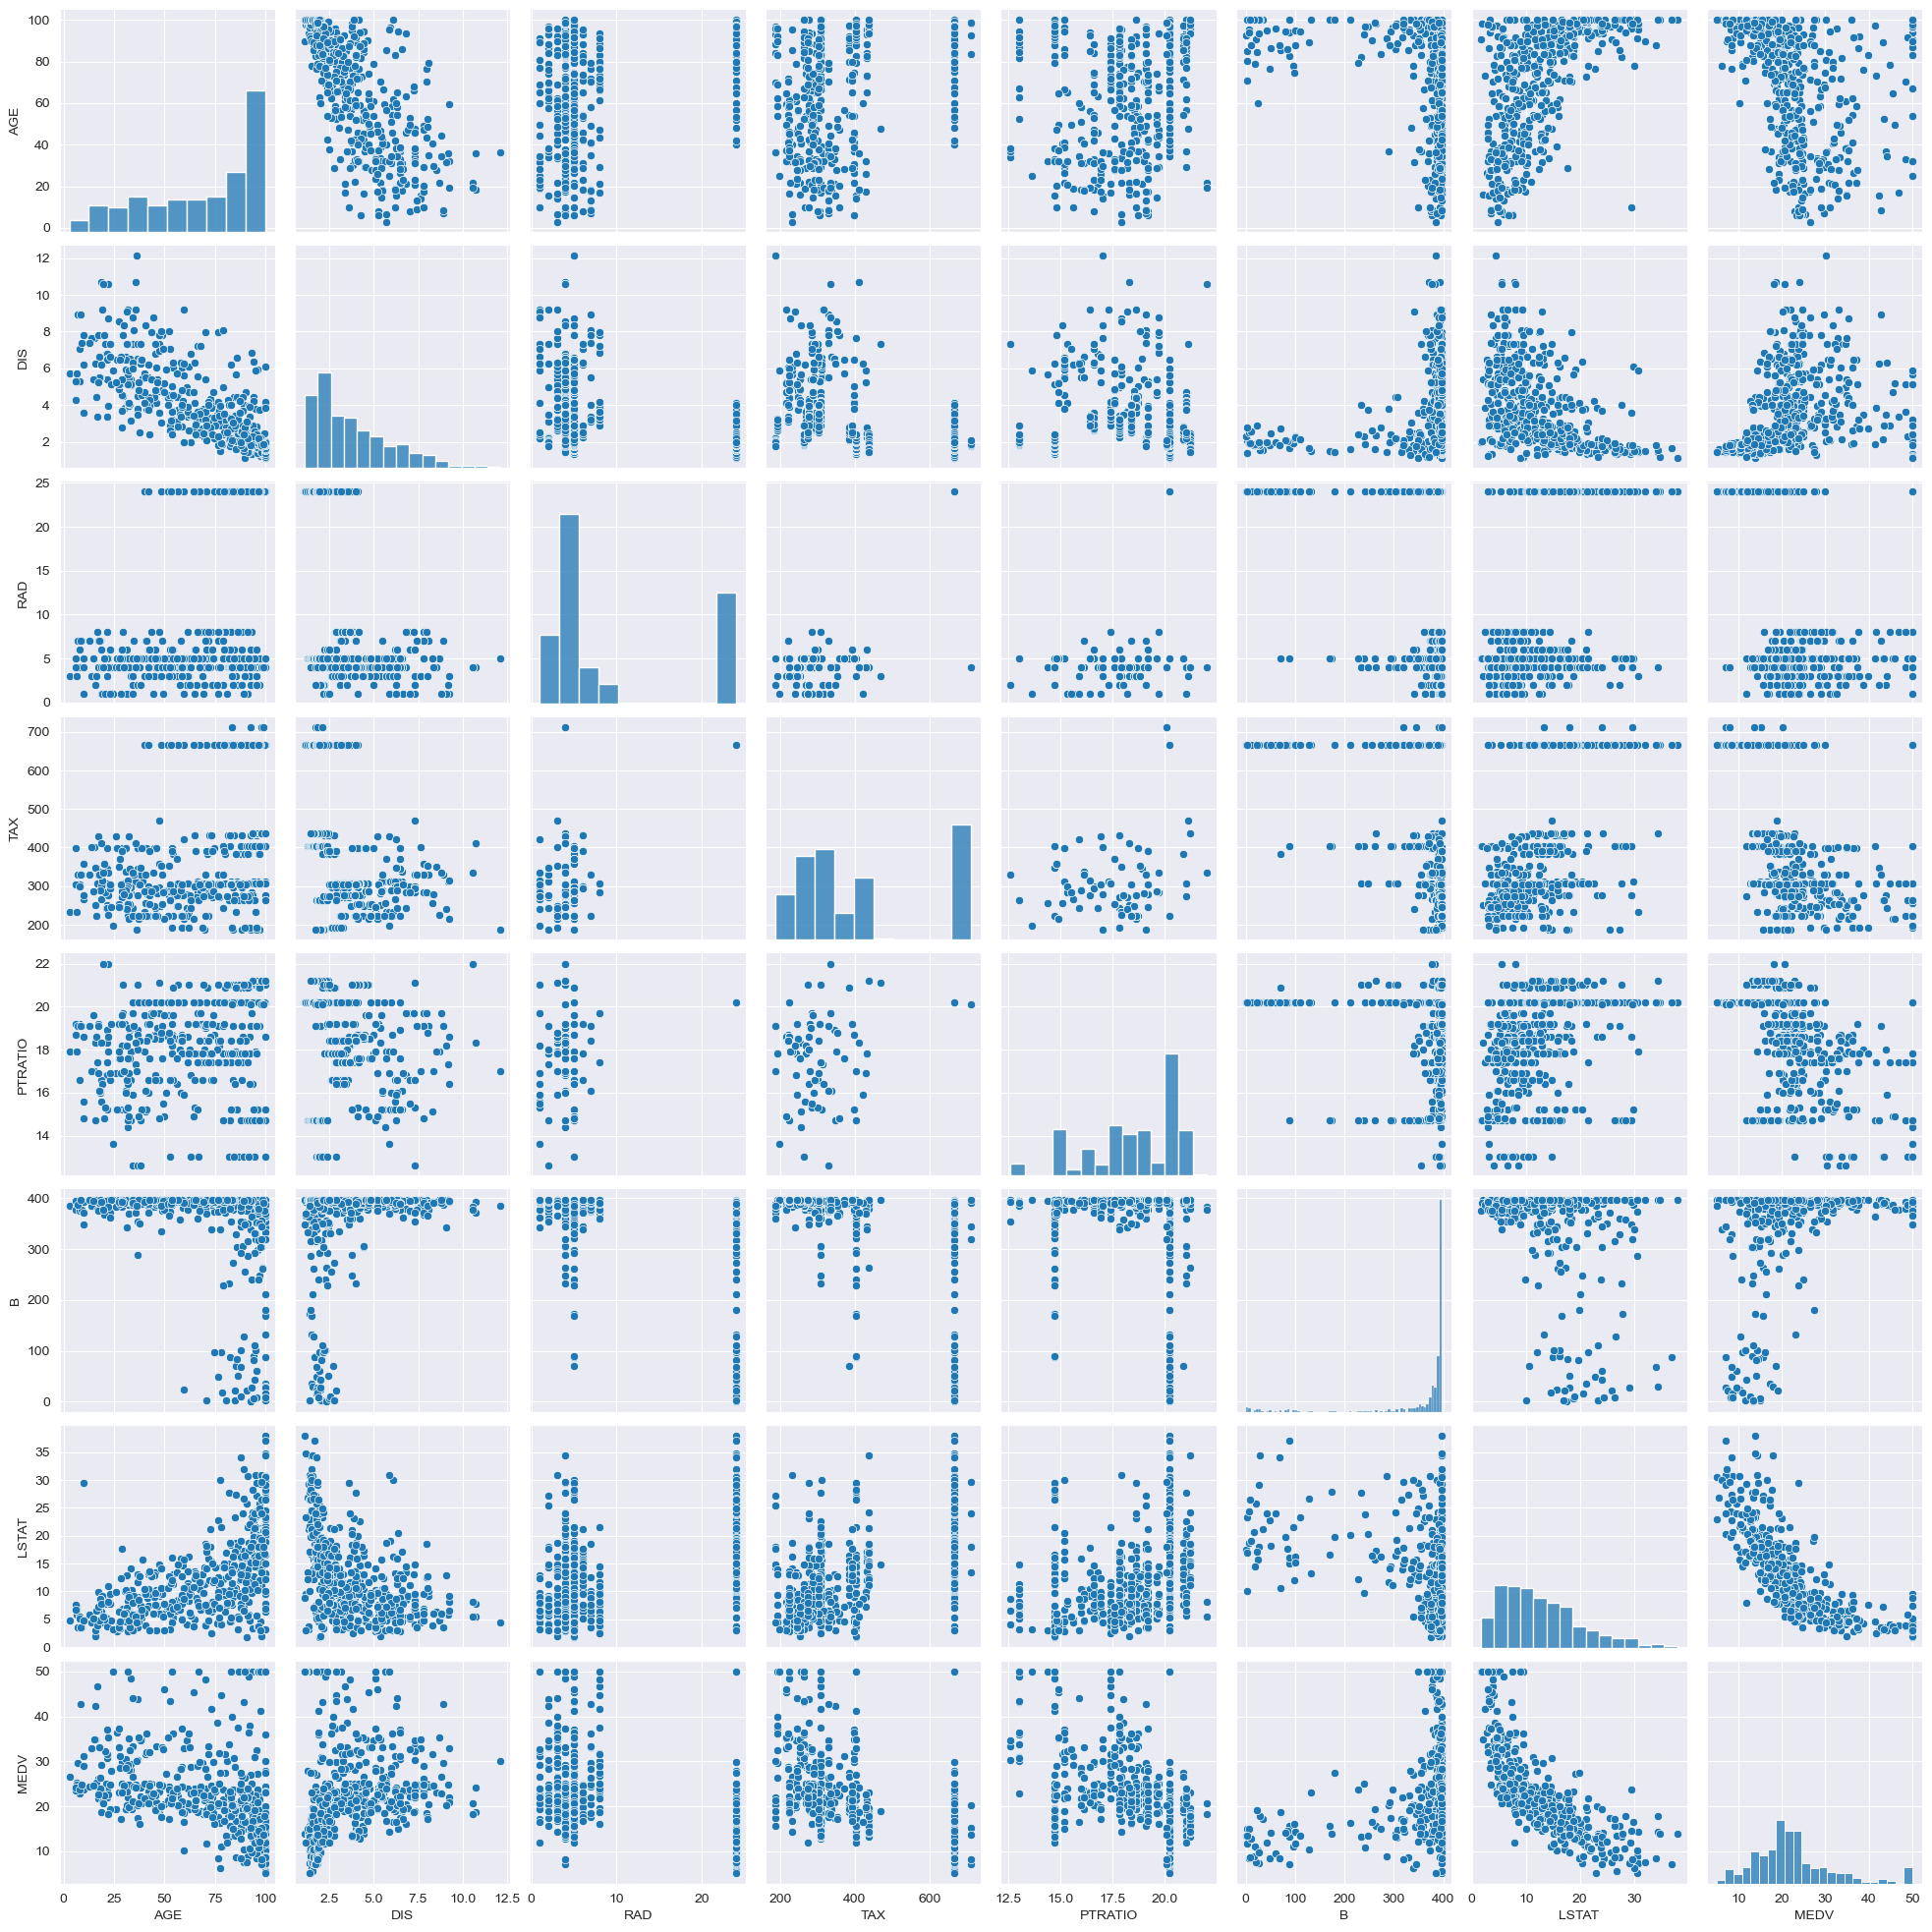

In [36]:
sns.pairplot(dataset[['AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']])
# AGE：1940年之前建造的自有住房的比例
# DIS：到五個波士頓就業中心的加權距離
# RAD：徑向公路通達性的指標
# TAX：每$ 10,000的全值財產稅率
# PTRATIO：各鎮的師生比率
# B：計算方法為1000（Bk-0.63）²，其中Bk是按城鎮劃分的非裔美國人的比例
# LSTAT：底層人口的百分比
# MEDV：自有住房的中位數價值(單位：1000美元)

# 4. Correlation
### <span style="color:#3498DB">Point1: 請觀察各變數之間的關係</span>
### <span style="color:#3498DB">Point2: 請判斷各變數之間是否有共線關係</span>

<Axes: >

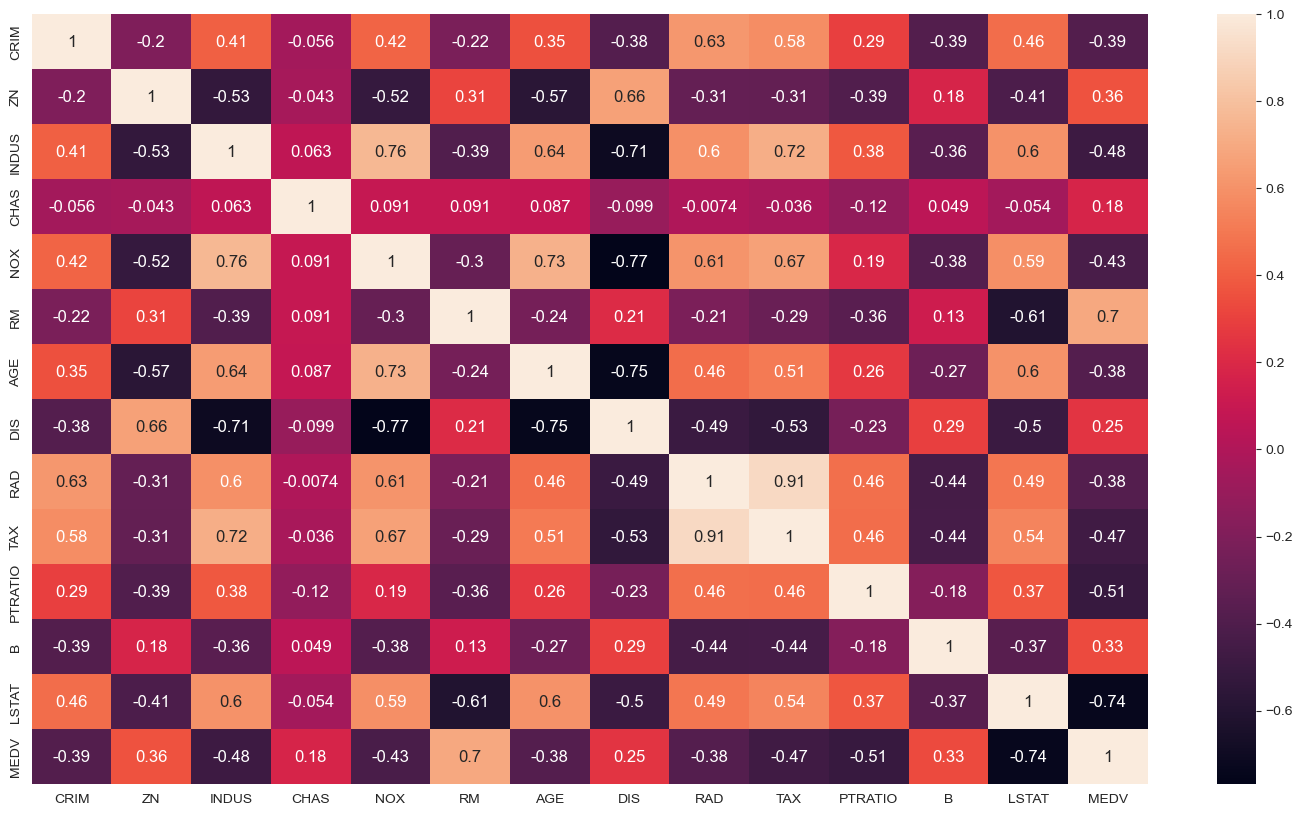

In [82]:
corrmat = dataset.corr() #相關性分析
'''
是一個 Pandas DataFrame 方法，用於計算數據集中各個數值特徵之間的相關性。
當您調用 dataset.corr() 時，
它將返回一個相關性矩陣，該矩陣顯示了數據集中每對特徵之間的相關性係數。
'''
fig, ax = plt.subplots(figsize = (18, 10))
'''
創建了一個圖形窗口（figure）和軸（axis），
並指定圖形的大小（figsize）為寬度 18 單位、高度 10 單位。
這是為了確保熱圖以適當的大小顯示在圖形中。
'''
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})
'''
是使用 Seaborn 库的 heatmap 函數來創建熱圖。它的參數包括：

corrmat：相關性矩陣，用於生成熱圖。

annot=True：這表示在熱圖上顯示相關性數值。設置為True時，
熱圖的每個小方塊中都會標註相關性數值。

annot_kws={'size': 12}：這是一個設置標註文本大小的參數，這裡設置文本大小為 12。
'''
print('完成')

# 5. Modeling

## 5-1 Linear Regression (PPT 1.1 & 1.2)

In [84]:
'''
目的：這段程式碼使用 scikit-learn 中的 LinearRegression 類別建立一個線性回歸模型，
並使用訓練數據 (X_train 和 y_train) 來擬合（fit）該模型
'''
from sklearn.linear_model import LinearRegression
'''
這一行從 scikit-learn 套件中引入了線性回歸模型，即 LinearRegression 類別。
線性回歸是一種用於建立線性模型的機器學習算法，用於預測一個連續的目標變數。
'''

regressor_linear = LinearRegression()
'''
這一行創建了一個線性回歸模型的實例，將其存儲在 regressor_linear 變數中。
這個模型將被用來進行線性回歸分析。
'''

regressor_linear.fit(X_train, y_train)
'''
這是模型的擬合（fit）步驟。它接受訓練數據 X_train（特徵）和 y_train（目標變數）
作為輸入，並通過訓練數據來調整模型的參數，使其能夠最好地擬合訓練數據。具體來說，
這一步就是在建立一個線性方程，該方程能夠最小化實際目標值和模型預測值之間的均方誤差，
以找到最佳的模型參數。
'''
print('OK')

OK


### <span style="color:#3498DB">Point: 請觀察模型是否穩定</span>

In [39]:
from sklearn.metrics import r2_score

# R2 score，即決定係數，反映Y的全部變異能通過迴歸關係被所有X解釋的比例。
# predict 預測
y_pred_linear_train = regressor_linear.predict(X_train)
'''
這一行使用已經擬合的線性回歸模型 regressor_linear 對訓練數據 
X_train 進行預測，並將預測結果存儲在 y_pred_linear_train 中。
'''

r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
'''
這一行計算了訓練集的 R² score，它是一個衡量模型對訓練數據擬合程度的指標。
R² score 的範圍從0到1，越接近1表示模型對訓練數據擬合得越好。
'''

y_pred_linear_test = regressor_linear.predict(X_test)
'''
這一行使用已經擬合的線性回歸模型對測試數據 X_test 進行預測，
並將預測結果存儲在 y_pred_linear_test 中。
'''

r2_score_linear_test = r2_score(y_test, y_pred_linear_test)
'''
這一行計算了測試集的 R² score，它用於衡量模型對測試數據的擬合程度。
'''

# RMSE一般指均方根誤差(標準誤差)，可衡量預測值和實際值之間的平均差異，
# 藉此估計預測模型預測目標值的準確度
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
'''
這一行計算了訓練集的均方根誤差（RMSE），它是一個衡量模型預測準確度的指標。
RMSE 越低表示模型預測越準確。
'''

rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
'''
這一行計算了測試集的均方根誤差，用於衡量模型對測試數據的預測準確度
'''

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.7435787589010061
R2_score (test):  0.7133593313710354
RMSE:  4.7585194913114925
RMSE:  4.64727974572421


### <span style="color:#3498DB">Point: 請找出顯著與不顯著的變數</span>

In [85]:
import statsmodels.api as sm
'''
這一行導入了 statsmodels 套件，
並將其別名設為 sm。statsmodels 是一個用於統計分析和建立統計模型的 Python 套件。
它包含許多統計模型和工具，可用於探索數據、進行假設檢驗和建立統計模型，
包括線性回歸、時間序列分析等。
'''
from scipy import stats
'''
這一行從 scipy 套件中導入了 stats 子模組。
scipy 是科學計算的 Python 套件，包含許多科學和統計計算的工具。
在這裡，stats 子模組提供了統計函數和檢驗方法，用於執行假設檢驗、計算統計量等。
'''
print('ok')

ok


In [41]:
X2 = sm.add_constant(X)
'''
這一行使用 sm 中的 add_constant 函數，將常數項（截距）添加到特徵矩陣 X 中。
這是因為線性回歸模型通常包括一個截距項，它表示當所有特徵都為零時，目標變數的預測值。
'''
est = sm.OLS(y, X2).fit()
'''
這一行使用 statsmodels 中的 OLS（Ordinary Least Squares，普通最小二乘法）
函數來擬合一個線性回歸模型。OLS 函數需要兩個參數：
y：目標變數的數值。
X2：包含常數項的特徵矩陣。
最後，使用 fit 方法擬合模型，並將結果存儲在 est 中。
'''
print(est.summary())
# 這一行打印出線性回歸模型的統計摘要（summary
# P  < .05, P  < .01,P  < .001

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          6.72e-135
Time:                        09:35:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### <span style="color:#3498DB">Test: 請將不顯著的變數與您覺得可能具有共線性的變數進行處理，再次跑迴歸，並觀察各類檢測數值是否有優化</span>

### <span style="color:#3498DB">Point: 預測結果</span>

In [86]:
to_be_predicted = np.array([
    [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
       6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
       1.8700e+01, 3.9412e+02, 5.2100e+00]
])
predicted_price = regressor_linear.predict(to_be_predicted)

In [87]:
predicted_price

array([[25.21778966]])

---

## 5-2 Polynomial regression (PPT 1.3)

In [92]:
'''
總結來說，這段程式碼建立了一個二次多項式回歸模型，
通過將原始特徵轉換成多項式特徵，使模型能夠更靈活地擬合非線性關係的數據。
此後，您可以使用這個多項式回歸模型來進行預測和評估，以更好地擬合數據中的非線性模式。
'''

from sklearn.preprocessing import PolynomialFeatures
'''
這一行導入了 scikit-learn 中的 PolynomialFeatures 類別，
這是用於多項式回歸的特徵轉換器。
'''
poly_reg = PolynomialFeatures(degree = 2)
'''
這一行創建了一個多項式特徵轉換器的實例 poly_reg，
並指定了多項式的次數為 2，即創建二次多項式特徵。
'''
X_poly = poly_reg.fit_transform(X_train)
'''
這一行將訓練數據 X_train 使用多項式特徵轉換器 poly_reg 進行特徵轉換，
得到多項式特徵矩陣 X_poly。這個多項式特徵矩陣包含原始特徵的多項式組合，以及截距項。
'''
poly_reg.fit(X_poly, y_train)
'''
這一行用轉換後的特徵矩陣 X_poly 進行擬合（fit），以學習多項式回歸的模型。
'''
regressor_poly2 = LinearRegression()
'''
這一行創建了一個線性回歸模型的實例 regressor_poly2，這個模型將用於多項式回歸。
'''
regressor_poly2.fit(X_poly, y_train)

'''
這一行使用多項式特徵矩陣 X_poly 和目標變數 y_train 來擬合
多項式回歸模型 regressor_poly2。模型將學習如何根據多項式特徵來預測目標變數。
'''
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

### <span style="color:#3498DB">Point: 請比較Linear Regression和Polynomial regression的差異，如兩個模型之間的穩定度及誤差 </span>
### <span style="color:#3498DB">Question: 你會選則哪個模型？</span>

In [93]:
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
'''
poly_reg.fit_transform(X_train)：這一步使用多項式特徵轉換器 poly_reg 對
訓練數據 X_train 進行特徵轉換。特徵轉換的目的是將原始特徵矩陣 X_train 中的特徵，
轉換成多項式特徵，包括原始特徵的各種組合以及截距項。這將產生一個新的特徵矩陣，
即多項式特徵矩陣。

regressor_poly2.predict(...)：接著，
您使用已經擬合的二次多項式回歸模型 regressor_poly2 來對轉換後的訓練數據進行預測。
這個預測是基於多項式回歸模型，它使用多項式特徵矩陣 X_poly 來預測目標變數的值。

y_pred_poly2_train：最終，
預測結果被存儲在 y_pred_poly2_train 中，這個變數包含了模型對訓練數據的預測值。
'''

r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)
'''
r2_score(y_train, y_pred_poly2_train)：這部分是一個函數呼叫，
其中 y_train 是實際的訓練集目標變數的值，
而 y_pred_poly2_train 是模型對訓練集的預測值。

r2_score 函數計算 R² score，這是一個衡量模型擬合性能的指標。
它的計算方式是比較實際觀測值和模型預測值之間的差異，
以評估模型的解釋能力。R² score 的值介於0和1之間，
越接近1表示模型對數據的擬合越好，越接近0表示模型對數據的擬合較差。

r2_score_poly2_train：最終，計算結果被存儲在變數 r2_score_poly2_train 中，
它代表了模型對訓練集的擬合程度，數值越高越好
'''

y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
'''
poly_reg.fit_transform(X_test)：
這一步使用多項式特徵轉換器 poly_reg 對測試數據 X_test 進行特徵轉換。
特徵轉換的目的是將原始特徵矩陣 X_test 中的特徵，轉換成多項式特徵，
包括原始特徵的各種組合以及截距項。這將產生一個新的特徵矩陣，即多項式特徵矩陣。

regressor_poly2.predict(...)：接著，
您使用已經擬合的二次多項式回歸模型 regressor_poly2 來對轉換後的測試數據進行預測。
這個預測是基於多項式回歸模型，
它使用多項式特徵矩陣 X_poly（轉換後的測試數據）來預測目標變數的值。

y_pred_poly2_test：最終，預測結果被存儲在 y_pred_poly2_test 中，
這個變數包含了模型對測試數據的預測值。
換句話說，y_pred_poly2_test 中的每個值代表模型對測試數據中相應樣本的預測目標值。
'''

r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)
'''
r2_score(y_test, y_pred_poly2_test)：這一部分是一個函數呼叫，
其中 y_test 是測試集的實際目標變數的值，而 y_pred_poly2_test 是模型對測試集的預測值。

r2_score 函數計算 R² score，這是一個衡量模型擬合性能的指標。
它的計算方式是比較實際觀測值和模型預測值之間的差異，
以評估模型的解釋能力。R² score 的值介於 0 和 1 之間，
越接近 1 表示模型對測試集的擬合越好，越接近 0 表示模型對測試集的擬合較差。

r2_score_poly2_test：最終，計算結果被存儲在變數 r2_score_poly2_test 中，
它代表了模型對測試集的擬合程度，數值越高越好。此指標告訴您模型對測試數據的預測準確度，
越接近 1 表示模型的預測能力越強。
'''
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_poly2_train)))
'''
np.sqrt(mean_squared_error(y_train, y_pred_poly2_train))：
這一部分計算了訓練集的均方根誤差（RMSE）。具體步驟如下：

mean_squared_error(y_train, y_pred_poly2_train)：
這部分是一個函數呼叫，其中 y_train 是訓練集的實際目標變數的值，
而 y_pred_poly2_train 是模型對訓練集的預測值。

mean_squared_error 函數計算均方誤差（MSE），
它是實際觀測值和模型預測值之間平方誤差的平均值。MSE 衡量了模型的預測誤差。

np.sqrt(...)：最後，對 MSE 的結果進行平方根運算，
以獲得 RMSE。RMSE 是均方根誤差，是一個衡量模型預測準確度的指標。
它的值越低表示模型對訓練集的預測越準確。

rmse_train：最終，RMSE 的計算結果被存儲在變數 rmse_train 中，
這個值代表了模型對訓練集的預測準確度。
換句話說，rmse_train 表示模型的預測誤差在訓練集上的表現。
'''

rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
'''
np.sqrt(mean_squared_error(y_test, y_pred_poly2_test))：
這一部分計算了測試集的均方根誤差（RMSE）。具體步驟如下：

mean_squared_error(y_test, y_pred_poly2_test)：
這部分是一個函數呼叫，其中 y_test 是測試集的實際目標變數的值，
而 y_pred_poly2_test 是模型對測試集的預測值。

mean_squared_error 函數計算均方誤差（MSE），
它是實際觀測值和模型預測值之間平方誤差的平均值。MSE 衡量了模型的預測誤差。

np.sqrt(...)：最後，對 MSE 的結果進行平方根運算，
以獲得 RMSE。RMSE 是均方根誤差，是一個衡量模型預測準確度的指標。
它的值越低表示模型對測試集的預測越準確。

rmse_test：最終，RMSE 的計算結果被存儲在變數 rmse_test 中，
這個值代表了模型對測試集的預測準確度。
換句話說，rmse_test 表示模型的預測誤差在測試集上的表現。
'''

print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

NameError: name 'r2_score' is not defined

### <span style="color:#3498DB">Point: 預測結果</span>

In [47]:
to_be_predicted = np.array([
    [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
       6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
       1.8700e+01, 3.9412e+02, 5.2100e+00]
])
predicted_price = regressor_poly2.predict(poly_reg.fit_transform(to_be_predicted))
'''
regressor_poly2.predict(poly_reg.fit_transform(to_be_predicted))：
這一部分是用已經訓練好的二次多項式回歸模型 regressor_poly2 對
新樣本 to_be_predicted 進行預測。

首先，對 to_be_predicted 進行多項式特徵轉換，
這是使用 poly_reg 物件來完成的。這將 to_be_predicted 中的特徵轉換成多項式特徵，
以便與模型的特徵匹配。

然後，使用 regressor_poly2 模型對轉換後的新樣本進行預測。
這個預測結果存儲在 predicted_price 中。
'''

predicted_price

array([[25.73197287]])

## 5-3 Lasso regression (PPT 1.4)

alpha : 懲罰度(λ):通常介於0~10 之間

In [48]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [61]:
#這段程式碼是使用 Lasso 回歸（L1 正則化線性回歸）來訓練一個模型。

lasso = Lasso(alpha =8) # , positive=True
'''
這一行創建了一個 Lasso 回歸模型的實例。在這個模型中，
alpha 是正則化參數，它控制了正則化的強度。
較大的 alpha 值會增加正則化的力度，導致模型的係數（權重）趨於零。這有助於減少過擬合。
'''
lasso.fit(X_train,y_train)
'''
這一行使用訓練集 X_train 和目標變數 y_train 來訓練 Lasso 回歸模型。
訓練過程中，模型會嘗試找到最適合的權重，
以最小化目標變數（房價）的預測誤差。
訓練過程會考慮到正則化，因此模型會傾向於使一些權重變為零，從而實現特徵選擇和模型簡化。
'''


y_pred_lasso_train = lasso.predict(X_train)
'''
這一行使用已經訓練好的 Lasso 回歸模型 lasso 對訓練集 X_train 進行預測，
並將預測結果存儲在 y_pred_lasso_train 中。
這個預測結果包含了模型對訓練集中每個樣本的目標變數（房價）的預測值。
'''
r2_score_lasso_train = lasso.score(X_train, y_train)
'''
這一行計算了訓練集的 R² score，也就是決定係數。
lasso.score 方法計算了模型對訓練集的擬合性能，
並返回 R² score 的值。R² score 是一個衡量模型擬合程度的指標，
介於 0 和 1 之間，越接近 1 表示模型擬合越好，越接近 0 表示模型擬合較差。
'''

y_pred_lasso_test = lasso.predict(X_test)
'''
這一行使用已經訓練好的 Lasso 回歸模型 lasso 對測試集 X_test 進行預測，
並將預測結果存儲在 y_pred_lasso_test 中。
這個預測結果包含了模型對測試集中每個樣本的目標變數（房價）的預測值。
'''
r2_score_lasso_test = lasso.score(X_test, y_test)
'''
這一行計算了測試集的 R² score，也就是決定係數。
lasso.score 方法計算了模型對測試集的擬合性能，
並返回 R² score 的值。R² score 是一個衡量模型擬合程度的指標，
介於 0 和 1 之間，越接近 1 表示模型擬合越好，越接近 0 表示模型擬合較差。
'''

rmse_lasso_train = (np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)))
'''
這一行計算了訓練集的均方根誤差（RMSE），具體步驟如下：

mean_squared_error(y_train, y_pred_lasso_train)：這部分是一個函數呼叫，
其中 y_train 是訓練集的實際目標變數的值，
而 y_pred_lasso_train 是模型對訓練集的預測值。

mean_squared_error 函數計算均方誤差（MSE），
它是實際觀測值和模型預測值之間平方誤差的平均值。MSE 衡量了模型的預測誤差。

np.sqrt(...)：最後，對 MSE 的結果進行平方根運算，
以獲得 RMSE。RMSE 是均方根誤差，是一個衡量模型預測準確度的指標。
它的值越低表示模型對訓練集的預測越準確。
'''
rmse_lasso_test = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
'''
這一行計算了測試集的均方根誤差（RMSE），
具體步驟與上述類似，只是針對測試集的實際目標變數和預測值進行計算。
'''

print("coef：")
for i, j in zip(dataset.columns, lasso.coef_):
    print(i, j)

coef：
CRIM -0.0
ZN 0.044006669173536336
INDUS -0.0
CHAS 0.0
NOX 0.0
RM 0.0
AGE 0.013661030134753066
DIS -0.0
RAD 0.0
TAX -0.009733735854920217
PTRATIO -0.0
B 0.007090431924212568
LSTAT -0.5910499764433194


Lasso Regression，使用L1正則化，一些參數的值可能會被壓縮到0，因此coef向量中相應的元素也會為0，代表這些特徵在模型中被認為是不重要的。     
可以進行特徵選擇，提高模型的性能和穩定性。

In [62]:
print("R2_score (train): ",r2_score_lasso_train)
print("R2_score (test):", r2_score_lasso_test)
print("train_RMSE: ", rmse_lasso_train)
print("test_RMSE: ", rmse_lasso_test)

R2_score (train):  0.5322522399364318
R2_score (test): 0.5411135044735458
train_RMSE:  6.426887707326391
test_RMSE:  5.880070732670301


## 5-4 Ridge regression (PPT 1.4)

In [65]:
ridgeReg = Ridge(alpha=5.5)

ridgeReg.fit(X_train, y_train)
'''
這是 Ridge 回歸模型的一個實例，通常通過使用 Ridge() 建構函數來創建。
這個模型將用於預測目標變數（例如，房價）。

fit(X_train, y_train)：fit 方法用於訓練模型，它需要兩個參數：

X_train：這是訓練集的特徵矩陣，包含了模型用來學習的特徵數據。
每一行代表一個樣本，每一列代表一個特徵。
y_train：這是訓練集的目標變數，包含了對應每個樣本的實際目標值（例如，對應的房價）。
'''
y_pred_ridge_train = ridgeReg.predict(X_train)
'''
這一行程式碼使用已經訓練好的 Ridge 回歸模型 ridgeReg 對訓練集 X_train 進行預測。
具體說明如下：

ridgeReg.predict(X_train)：這部分是對訓練集的預測操作。
模型使用訓練集的特徵數據 X_train 來進行預測，並返回預測的目標變數值。
這些預測值存儲在變數 y_pred_ridge_train 中。
'''

r2_score_ridge_train = ridgeReg.score(X_train, y_train)
'''
這一行程式碼計算了訓練集上的 R2 分數，
用來評估 Ridge 回歸模型在訓練數據上的表現。具體說明如下：

ridgeReg.score(X_train, y_train)：
這部分使用模型 ridgeReg 對訓練集 X_train 進行預測，
然後計算預測值和實際目標變數值之間
的 R2 分數。R2 分數（決定係數）是一個衡量模型對訓練集擬合程度的指標，
值介於0和1之間，越接近1表示模型對訓練數據的擬合越好。
計算結果存儲在變數 r2_score_ridge_train 中。
'''

y_pred_ridge_test = ridgeReg.predict(X_test)
r2_score_ridge_test = ridgeReg.score(X_test, y_test)

rmse_ridge_train = (np.sqrt(mean_squared_error(y_train, y_pred_ridge_train)))
'''
這一行程式碼使用已經訓練好的 Ridge 回歸模型 ridgeReg 對測試集 X_test 進行預測。
具體說明如下：

ridgeReg.predict(X_test)：這部分是對測試集的預測操作。
模型使用測試集的特徵數據 X_test 來進行預測，並返回預測的目標變數值。
這些預測值存儲在變數 y_pred_ridge_test 中。
'''
rmse_ridge_test = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
'''
這一行程式碼計算了測試集上的 R2 分數，用來評估 Ridge 回歸模型在測試數據上的表現。
具體說明如下：

ridgeReg.score(X_test, y_test)：
這部分使用模型 ridgeReg 對測試集 X_test 進行預測，
然後計算預測值和實際目標變數值之間的 R2 分數。R2 分數
是一個衡量模型對測試數據的解釋能力的指標，值介於0和1之間，
越接近1表示模型對測試數據的解釋能力越好。計算結果存儲在變數 r2_score_ridge_test 中。
'''
print("coef：")
for i, j in zip(dataset.columns, ridgeReg.coef_[0]):
    print(i, j)

coef：
CRIM -0.107750217809604
ZN 0.05470650466806647
INDUS -0.04368802560710481
CHAS 0.4340605030334634
NOX -3.2002116490951193
RM 3.940885283396631
AGE -0.018319072217978422
DIS -1.3262054569037558
RAD 0.3558854538167055
TAX -0.018789398932864434
PTRATIO -0.8040556097809284
B 0.008909977481756783
LSTAT -0.49081936383521535


Ridge Regression使用L2正則化來限制模型參數的大小，從而降低模型的複雜度並避免過度擬合。
L2正則化不會將參數壓縮到0，因此coef向量中的每個元素都對模型的預測有貢獻。

In [66]:
print("R2_score (train): ",r2_score_ridge_train)
print("R2_score (test):", r2_score_ridge_test)
print("train_RMSE: ", rmse_ridge_train)
print("test_RMSE: ", rmse_ridge_test)

R2_score (train):  0.7345312908437156
R2_score (test): 0.707510708008823
train_RMSE:  4.841740651163068
test_RMSE:  4.694451941133143
